# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key
#api_key = "3bddfc8bf688bca80334bf98d33570cb"
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_code = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #for the heck of it we will also collect the country code. God forbid there are 2 cities with similar names!!!
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        country_code.append(country)

# Print the city count to confirm sufficient count
len(cities)

625

In [3]:
print(f"We collected {len(cities)} individual cities and their corresponding {len(country_code)} countries")

We collected 625 individual cities and their corresponding 625 countries


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#lets save more variables than we need to!
lat = []
lon=[]
citylist = []
temp=[]
tempmax= []
tempmin = []
clouds= []
dt=[]
wind = []
humidity=[]
#counters for record processing. Dont want to exceed 60 per minute!
counter = 1
max60requests_counter = 1
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
print("Beginning DATA RETRIVAL")
print("-----------------------")

for city in cities:
    
    try:        
        response = requests.get(query_url + city).json()
        print(f" Processing record number {counter} of set {max60requests_counter} | {(response['name'])}")
        print(f"{(query_url + city)}")
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])           
        citylist.append(response['name'])
        temp.append(response['main']['temp'])
        tempmax.append(response['main']['temp_max'])
        tempmin.append(response['main']['temp_min'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        dt.append(response['dt'])
        clouds.append(response['clouds']['all'])
        if counter < 60:
            counter +=1
        else:
            counter = 0
            max60requests_counter +=1
            time.sleep(2)
            

            
            
    except KeyError:
        print("Record not found. skipping and moving on up!")
print("-----------------------")
print("Retrival Complete")
print("-----------------------")   

Beginning DATA RETRIVAL
-----------------------
 Processing record number 1 of set 1 | Kodiak
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=kodiak
 Processing record number 2 of set 1 | Busselton
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=busselton
 Processing record number 3 of set 1 | Atuona
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=atuona
 Processing record number 4 of set 1 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=punta arenas
 Processing record number 5 of set 1 | Necochea
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=necochea
 Processing record number 6 of set 1 | Port Macquarie
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=port 

 Processing record number 51 of set 1 | Sitka
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=sitka
 Processing record number 52 of set 1 | Lebu
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=lebu
 Processing record number 53 of set 1 | Gatton
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=gatton
 Processing record number 54 of set 1 | Vaini
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=vaini
 Processing record number 55 of set 1 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=mataura
 Processing record number 56 of set 1 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=vila velha
Record not found. skipping and moving on up!
 Processing record numb

 Processing record number 41 of set 2 | Thinadhoo
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=thinadhoo
 Processing record number 42 of set 2 | Castro
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=castro
 Processing record number 43 of set 2 | Iqaluit
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=iqaluit
 Processing record number 44 of set 2 | Foldeak
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=foldeak
 Processing record number 45 of set 2 | Oranjemund
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=oranjemund
Record not found. skipping and moving on up!
Record not found. skipping and moving on up!
 Processing record number 46 of set 2 | Sao Filipe
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688b

 Processing record number 29 of set 3 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=carnarvon
 Processing record number 30 of set 3 | Aksarka
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=aksarka
 Processing record number 31 of set 3 | Calabozo
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=calabozo
 Processing record number 32 of set 3 | Praia da Vitoria
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=praia da vitoria
 Processing record number 33 of set 3 | Skibbereen
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=skibbereen
 Processing record number 34 of set 3 | Bowen
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=bowen
 Processing record number 35 of 

 Processing record number 19 of set 4 | Schoneiche
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=schoneiche
 Processing record number 20 of set 4 | Talnakh
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=talnakh
 Processing record number 21 of set 4 | Porosozero
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=porosozero
 Processing record number 22 of set 4 | Pringsewu
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=pringsewu
 Processing record number 23 of set 4 | Werneck
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=werneck
 Processing record number 24 of set 4 | Alofi
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=alofi
 Processing record number 25 of set 4 | Huangm

 Processing record number 11 of set 5 | Poitiers
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=poitiers
 Processing record number 12 of set 5 | Palmeira das Missoes
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=palmeira das missoes
 Processing record number 13 of set 5 | Khandyga
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=khandyga
 Processing record number 14 of set 5 | Namibe
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=namibe
Record not found. skipping and moving on up!
 Processing record number 15 of set 5 | Apomu
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=apomu
Record not found. skipping and moving on up!
 Processing record number 16 of set 5 | Basco
http://api.openweathermap.org/data/2.5/weather?appid=3b

 Processing record number 0 of set 6 | San Martin
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=san martin
 Processing record number 1 of set 6 | Alyangula
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=alyangula
 Processing record number 2 of set 6 | Marolambo
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=marolambo
 Processing record number 3 of set 6 | Lata
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=lata
 Processing record number 4 of set 6 | Mahajanga
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=mahajanga
Record not found. skipping and moving on up!
 Processing record number 5 of set 6 | Kuching
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=kuching
Record 

http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=noumea
 Processing record number 50 of set 6 | Abyek
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=abyek
 Processing record number 51 of set 6 | Ust-Tsilma
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=ust-tsilma
 Processing record number 52 of set 6 | Kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=kudahuvadhoo
 Processing record number 53 of set 6 | Trapani
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=trapani
 Processing record number 54 of set 6 | Athabasca
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=athabasca
 Processing record number 55 of set 6 | Bay City
http://api.openweathermap.org/data/2.5/wea

 Processing record number 39 of set 7 | Baruun-Urt
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=baruun-urt
 Processing record number 40 of set 7 | Kruisfontein
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=kruisfontein
 Processing record number 41 of set 7 | Moerai
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=moerai
 Processing record number 42 of set 7 | Nikolayevsk-na-amure
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=nikolayevsk-na-amure
 Processing record number 43 of set 7 | Aklavik
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=aklavik
 Processing record number 44 of set 7 | Manokwari
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=manokwari
 Processing re

Record not found. skipping and moving on up!
 Processing record number 29 of set 8 | Anisoc
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=anisoc
 Processing record number 30 of set 8 | Astara
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=astara
Record not found. skipping and moving on up!
 Processing record number 31 of set 8 | Kamaishi
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=kamaishi
 Processing record number 32 of set 8 | Lasa
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=lasa
 Processing record number 33 of set 8 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=vila franca do campo
 Processing record number 34 of set 8 | Halifax
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc

 Processing record number 18 of set 9 | Timbuktu
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=tombouctou
 Processing record number 19 of set 9 | Trairi
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=trairi
 Processing record number 20 of set 9 | Cacu
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=cacu
 Processing record number 21 of set 9 | Pak Phanang
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=pak phanang
 Processing record number 22 of set 9 | Cairns
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=cairns
 Processing record number 23 of set 9 | Bonavista
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=bonavista
 Processing record number 24 of set 9 | Hay River
ht

 Processing record number 7 of set 10 | Boundiali
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=boundiali
 Processing record number 8 of set 10 | Filadelfia
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=filadelfia
 Processing record number 9 of set 10 | Pahrump
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=pahrump
 Processing record number 10 of set 10 | Hambantota
http://api.openweathermap.org/data/2.5/weather?appid=3bddfc8bf688bca80334bf98d33570cb&units=metric&q=hambantota
-----------------------
Retrival Complete
-----------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_list = pd.DataFrame(citylist, columns=['City'])
temp_list = pd.DataFrame(temp, columns=['Temperature'])
humidity_list = pd.DataFrame(humidity, columns=['Humidity'])
clouds_list = pd.DataFrame(clouds, columns=['Clouds'])
wind_speed_list = pd.DataFrame(wind, columns=['Wind'])
lat_list = pd.DataFrame(lat, columns=['Latitude'])
lng_list = pd.DataFrame(lon, columns=['Longitude'])

#combine all into one dataframe and Write to CSV
weather_combined = pd.concat([cities_list, temp_list,humidity_list,clouds_list,wind_speed_list, lng_list, lat_list], axis=1, join_axes=[cities_list.index])

# write to CSV
weather_combined.to_csv('Weather Full Data Frame.csv')

#display 
weather_combined.head(10)

,City,Temperature,Humidity,Clouds,Wind,Longitude,Latitude
0,Kodiak,15.86,19,1,5.10,-94.76,39.95
1,Busselton,12.09,49,12,6.48,115.35,-33.64
2,Atuona,28.02,100,8,5.88,-139.03,-9.80
3,Punta Arenas,11.23,71,90,7.20,-70.91,-53.16
4,Necochea,15.00,67,0,3.33,-58.74,-38.55
5,Port Macquarie,21.08,64,90,2.10,152.91,-31.43
6,Hit,8.12,84,56,1.38,42.83,33.64
7,Hasaki,8.12,39,0,2.10,140.83,35.73
8,Nishihara,10.93,37,20,2.60,139.53,35.74
9,Saint-Philippe,-0.95,36,1,1.50,-73.48,45.36


In [6]:
#describe the dataframe
weather_combined.count()

City           559
Temperature    559
Humidity       559
Clouds         559
Wind           559
Longitude      559
Latitude       559
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Temerature')

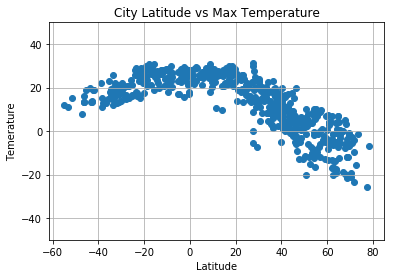

In [7]:
plt.scatter(weather_combined['Latitude'], weather_combined['Temperature'])

plt.grid(b=None, which='major', axis='both')
plt.ylim(-50,50)

# Create a title, x label, and y label for chart
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temerature")

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity')

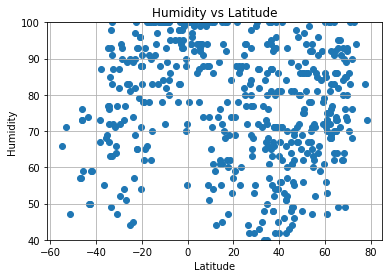

In [8]:
plt.scatter(weather_combined['Latitude'], weather_combined['Humidity'])
plt.grid(b=None, which='major', axis='both')
plt.ylim(40,100)

# Create a title, x label, and y label for chart
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Clouds')

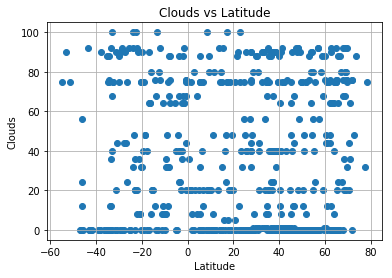

In [9]:
plt.scatter(weather_combined['Latitude'], weather_combined['Clouds'])
plt.grid(b=None, which='major', axis='both')

# Create a title, x label, and y label for chart
plt.title("Clouds vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Clouds")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind')

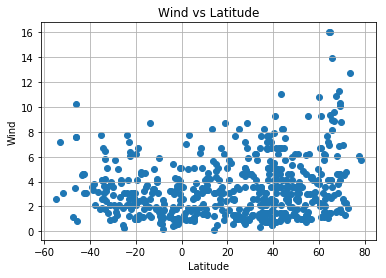

In [10]:
plt.scatter(weather_combined['Latitude'], weather_combined['Wind'])
plt.grid(b=None, which='major', axis='both')

# Create a title, x label, and y label for chart
plt.title("Wind vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind")